In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\16_Neural_Network\gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
data.shape

(15039, 11)

In [4]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


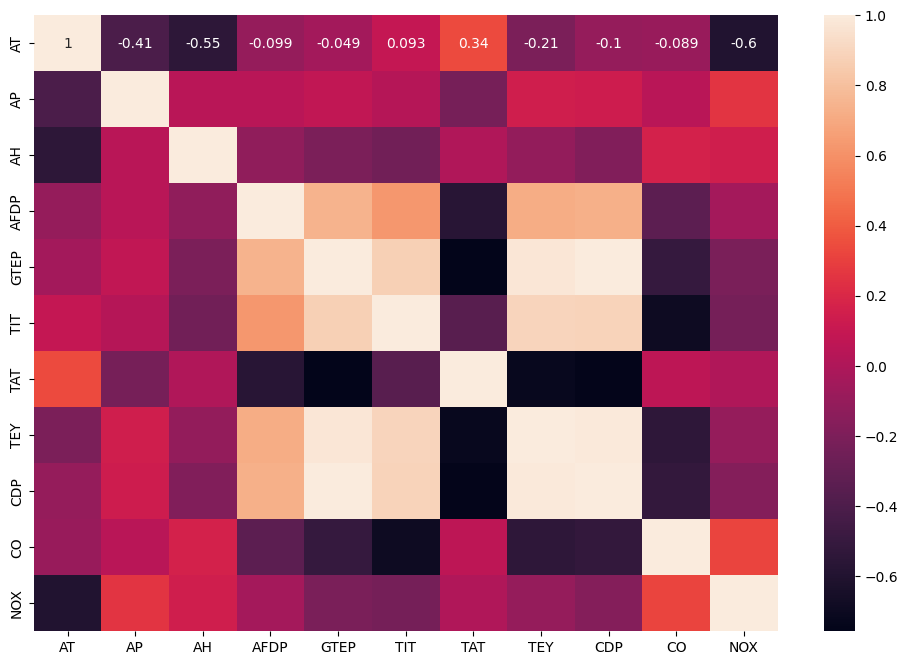

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Visualization using distplot

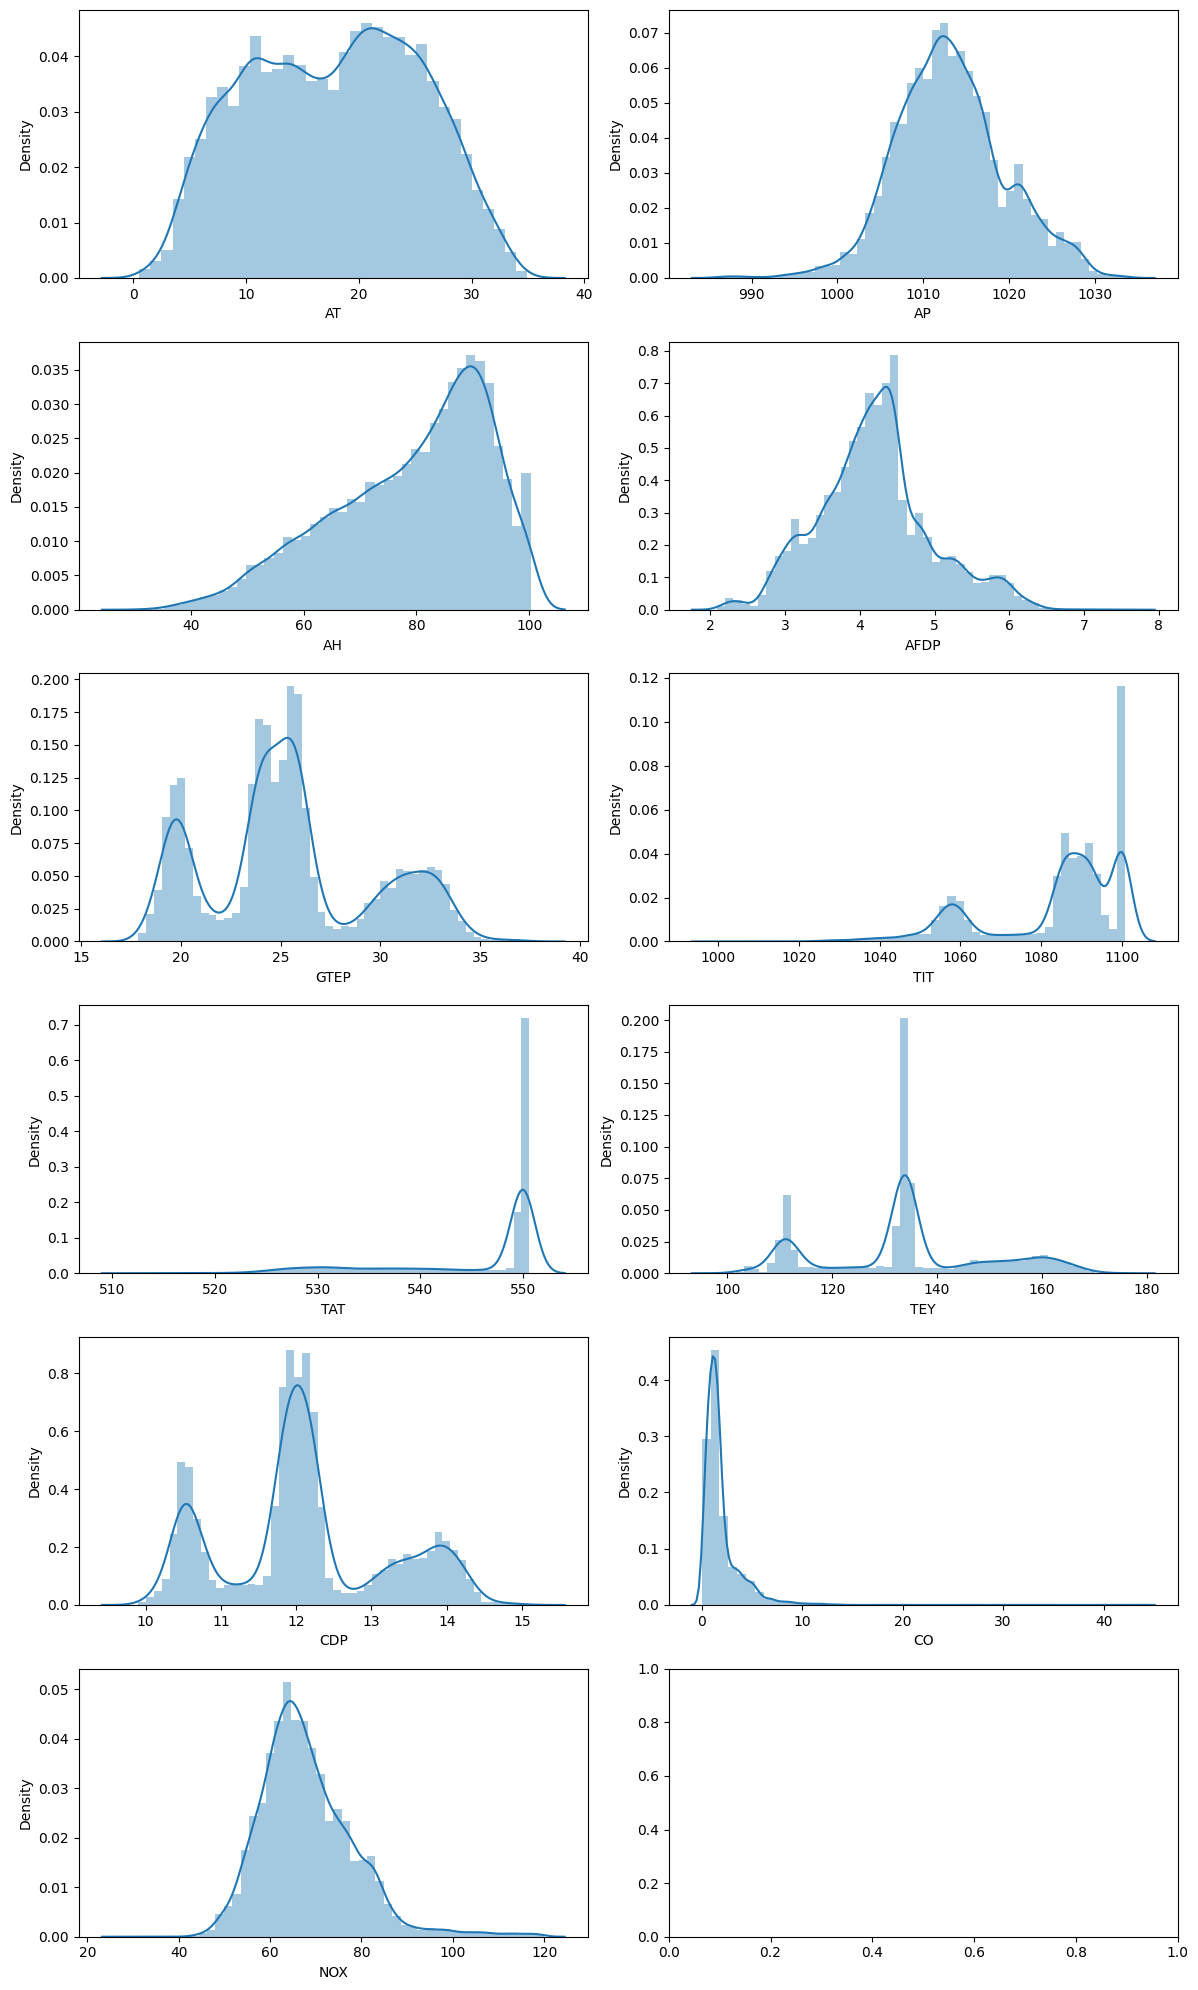

In [8]:
fig, ax = plt.subplots(6,2, figsize = (12,20))

sns.distplot(data.AT, ax = ax[0,0])
sns.distplot(data.AP, ax = ax[0,1])
sns.distplot(data.AH, ax = ax[1,0])
sns.distplot(data.AFDP, ax = ax[1,1])
sns.distplot(data.GTEP, ax = ax[2,0])
sns.distplot(data.TIT, ax = ax[2,1])
sns.distplot(data.TAT, ax = ax[3,0])
sns.distplot(data.TEY, ax = ax[3,1])
sns.distplot(data.CDP, ax = ax[4,0])
sns.distplot(data.CO, ax = ax[4,1])
sns.distplot(data.NOX, ax = ax[5,0])

plt.tight_layout()
plt.show()


#Extracting the independent and dependent variables

In [9]:
data["TEy"] = 1
data.loc[data["TEY"] > 135,"TEy"] = 2
data.drop(["TEY"],axis = 1,inplace= True)

In [10]:
x = np.array(data.iloc[:,0:10])
y = np.array(data.iloc[:,10])

#Normalizing data

In [11]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


x_norm = norm_func(x)

#Data Splitting :

In [12]:
from sklearn.model_selection import train_test_split

In [13]:

x_train,x_test,y_train,y_test = train_test_split(x_norm,y, test_size = 0.2)

# create the neural network

In [14]:
import keras.models
import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()
seed = 7
np.random.seed(seed)
model.add(Dense(8, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(4,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

In [16]:

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
model.fit(x_train,y_train, validation_split = 0.3, epochs = 100, batch_size = 10)

Epoch 1/100


843/843 [==============================] - 5s 4ms/step - loss: 0.5041 - accuracy: 0.5604 - val_loss: 0.2107 - val_accuracy: 0.6945
Epoch 2/100
843/843 [==============================] - 3s 3ms/step - loss: 0.2062 - accuracy: 0.7056 - val_loss: 0.2116 - val_accuracy: 0.6945
Epoch 3/100
843/843 [==============================] - 3s 3ms/step - loss: 0.2052 - accuracy: 0.7056 - val_loss: 0.2101 - val_accuracy: 0.6945
Epoch 4/100
843/843 [==============================] - 3s 3ms/step - loss: 0.2038 - accuracy: 0.7056 - val_loss: 0.2072 - val_accuracy: 0.6945
Epoch 5/100
843/843 [==============================] - 3s 3ms/step - loss: 0.2026 - accuracy: 0.7056 - val_loss: 0.2060 - val_accuracy: 0.6945
Epoch 6/100
843/843 [==============================] - 3s 3ms/step - loss: 0.2015 - accuracy: 0.7056 - val_loss: 0.2042 - val_accuracy: 0.6945
Epoch 7/100
843/843 [==============================] - 3s 3ms/step - loss: 0.1998 - accuracy: 0.7056 - val_loss: 0.2028 - val_accuracy: 0.69

In [18]:
#training accuracy
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

376/376 [==============================] - 1s 2ms/step - loss: 0.0572 - accuracy: 0.7023
accuracy: 70.23%


In [19]:
#testing accuracy
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

94/94 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.7068
accuracy: 70.68%


In [20]:
history = model.fit(x_train,y_train, validation_split = 0.3, epochs = 100, batch_size = 10)

Epoch 1/100
843/843 [==============================] - 3s 4ms/step - loss: 0.0576 - accuracy: 0.7056 - val_loss: 0.0580 - val_accuracy: 0.6945
Epoch 2/100
843/843 [==============================] - 3s 3ms/step - loss: 0.0576 - accuracy: 0.7056 - val_loss: 0.0555 - val_accuracy: 0.6945
Epoch 3/100
843/843 [==============================] - 3s 3ms/step - loss: 0.0573 - accuracy: 0.7056 - val_loss: 0.0556 - val_accuracy: 0.6945
Epoch 4/100
843/843 [==============================] - 3s 3ms/step - loss: 0.0573 - accuracy: 0.7056 - val_loss: 0.0556 - val_accuracy: 0.6945
Epoch 5/100
843/843 [==============================] - 3s 3ms/step - loss: 0.0571 - accuracy: 0.7056 - val_loss: 0.0556 - val_accuracy: 0.6945
Epoch 6/100
843/843 [==============================] - 3s 3ms/step - loss: 0.0571 - accuracy: 0.7056 - val_loss: 0.0572 - val_accuracy: 0.6945
Epoch 7/100
843/843 [==============================] - 3s 3ms/step - loss: 0.0577 - accuracy: 0.7056 - val_loss: 0.0564 - val_accuracy: 0.6945

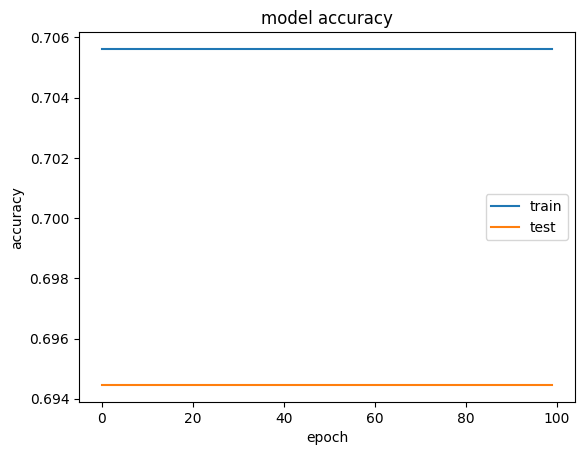

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

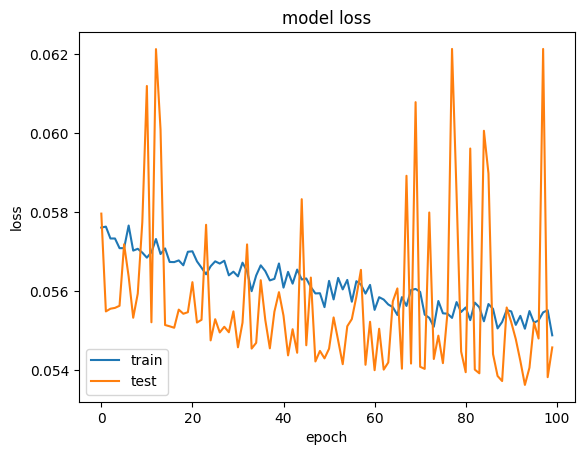

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()